input
input
output
affine
linear
input
output
affine
linear
input
output


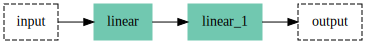

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 2.43.0 (0)
 -->
<!-- Title: %3 Pages: 1 -->
<svg width="366pt" height="44pt"
 viewBox="0.00 0.00 366.00 44.00" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">
<g id="graph0" class="graph" transform="scale(1 1) rotate(0) translate(4 40)">
<title>%3</title>
<polygon fill="white" stroke="transparent" points="-4,4 -4,-40 362,-40 362,4 -4,4"/>
<!-- input -->
<g id="node1" class="node">
<title>input</title>
<polygon fill="none" stroke="black" stroke-dasharray="5,2" points="54,-36 0,-36 0,0 54,0 54,-36"/>
<text text-anchor="middle" x="27" y="-14.3" font-family="Times,serif" font-size="14.00">input</text>
</g>
<!-- linear -->
<g id="node2" class="node">
<title>linear</title>
<polygon fill="#71c8b0" stroke="#71c8b0" points="148,-36 90,-36 90,0 148,0 148,-36"/>
<text text-anchor

In [74]:
import nir
import nirviz
import importlib
importlib.reload(nirviz)
import numpy as np

w = np.random.randn(2, 2)
graph = nir.NIRGraph.from_list(nir.Linear(weight=w), nir.Linear(weight=w))
viz = nirviz.visualize(graph)
viz